In [228]:
from sklearn.linear_model import HuberRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
seed = np.random.seed(42)

In [229]:
train = pd.read_csv('resources/train.csv')
test = pd.read_csv('resources/test.csv')

In [230]:
train.head(3)

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5


In [231]:
test.head(3)

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,10407,884.0,121.420000,35.36,5.28,82.561240,9.370384,2.298,1.9072,1.200,0.461899,1.79459
1,10408,90.0,9.931960,18.00,5.60,39.568056,12.086300,2.868,1.6520,0.864,0.476196,1.41194
2,10409,116.0,7.767992,11.60,4.80,23.231818,11.023840,2.644,1.7940,0.960,0.499514,0.78834


## 1. Feature correlations

In [232]:
train = train.drop(columns=['id'])
features = train.columns.tolist()

In [233]:
correlation_matrix = train.corr()

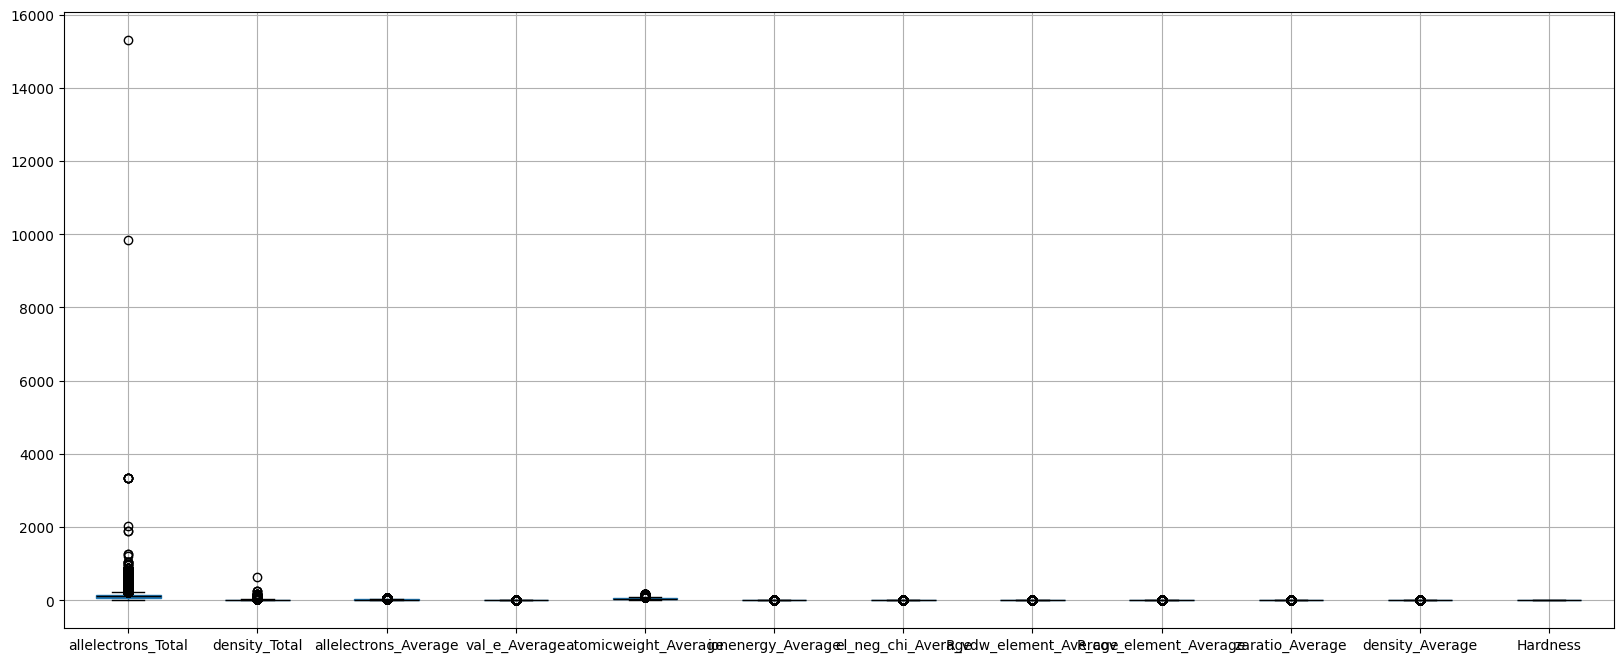

In [234]:
plt.figure(figsize=(20, 8))
train.boxplot(vert=True, patch_artist=True, medianprops={'color':'black'})
plt.show()

<Axes: >

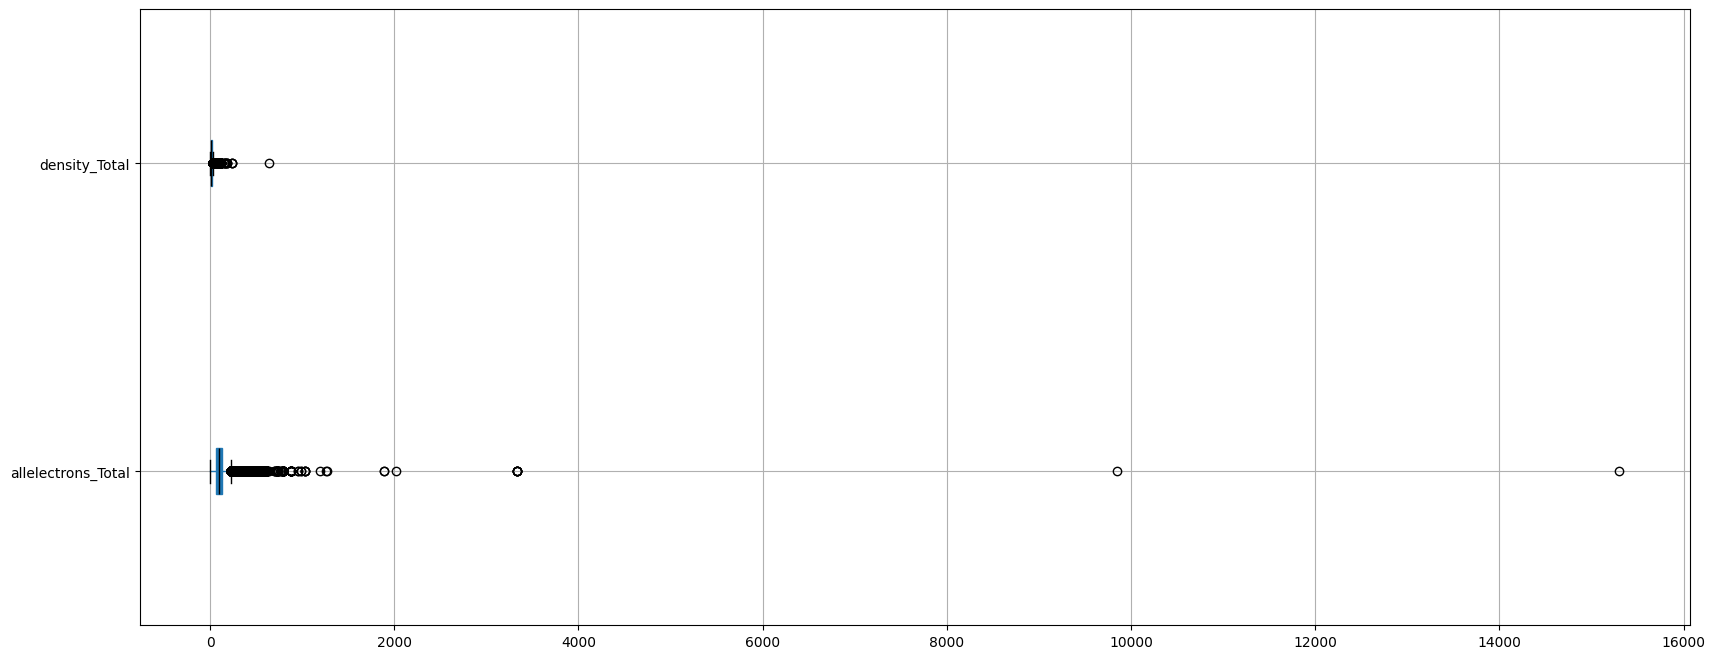

In [235]:
plt.figure(figsize=(20,8))
train[['allelectrons_Total','density_Total']].boxplot(vert=False,patch_artist=True,medianprops={'color':'black'})

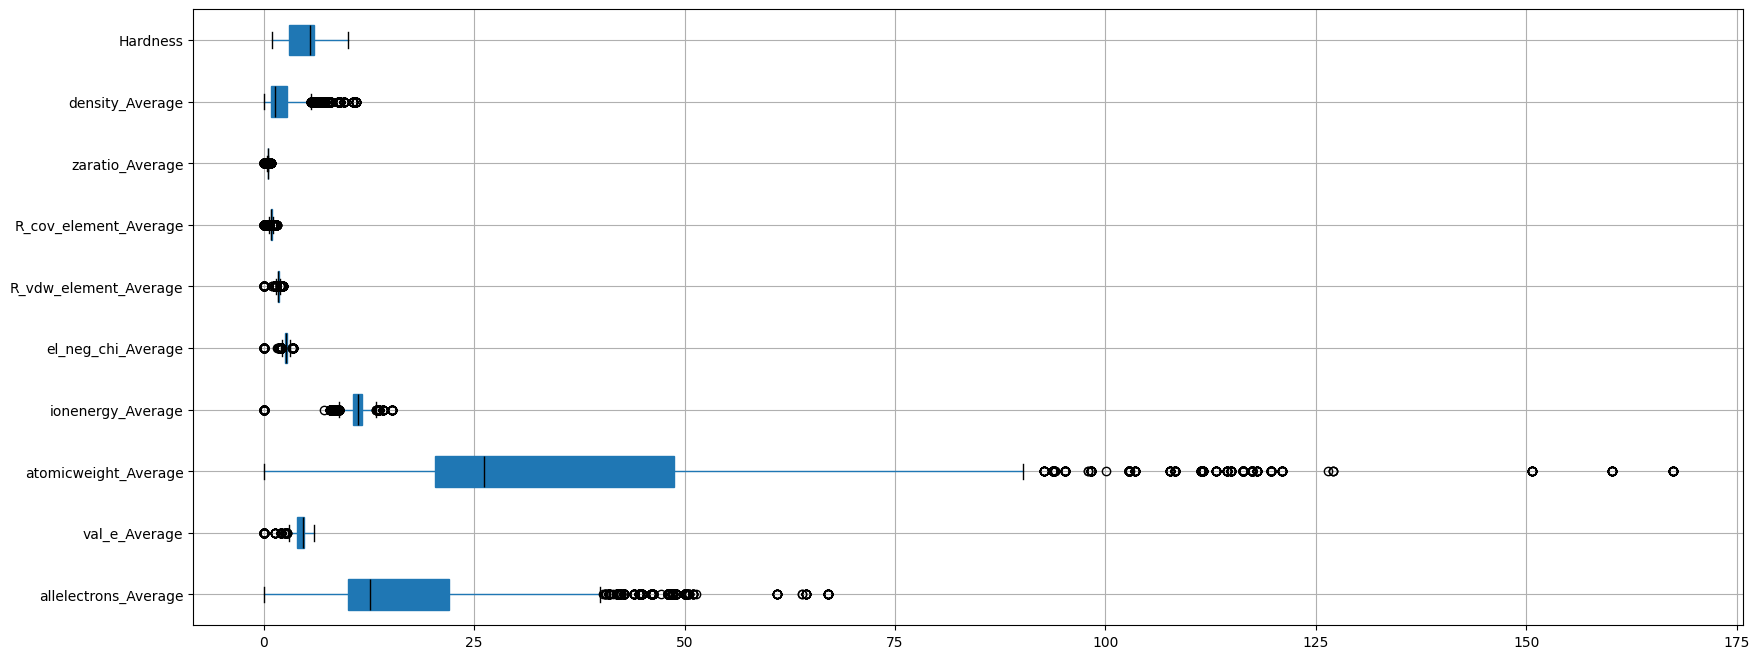

In [236]:
train_tehee = train.drop(columns=['allelectrons_Total','density_Total'])
plt.figure(figsize=(20, 8))
train_tehee.boxplot(vert=False, patch_artist=True, medianprops={'color':'black'})
plt.show()

<Axes: >

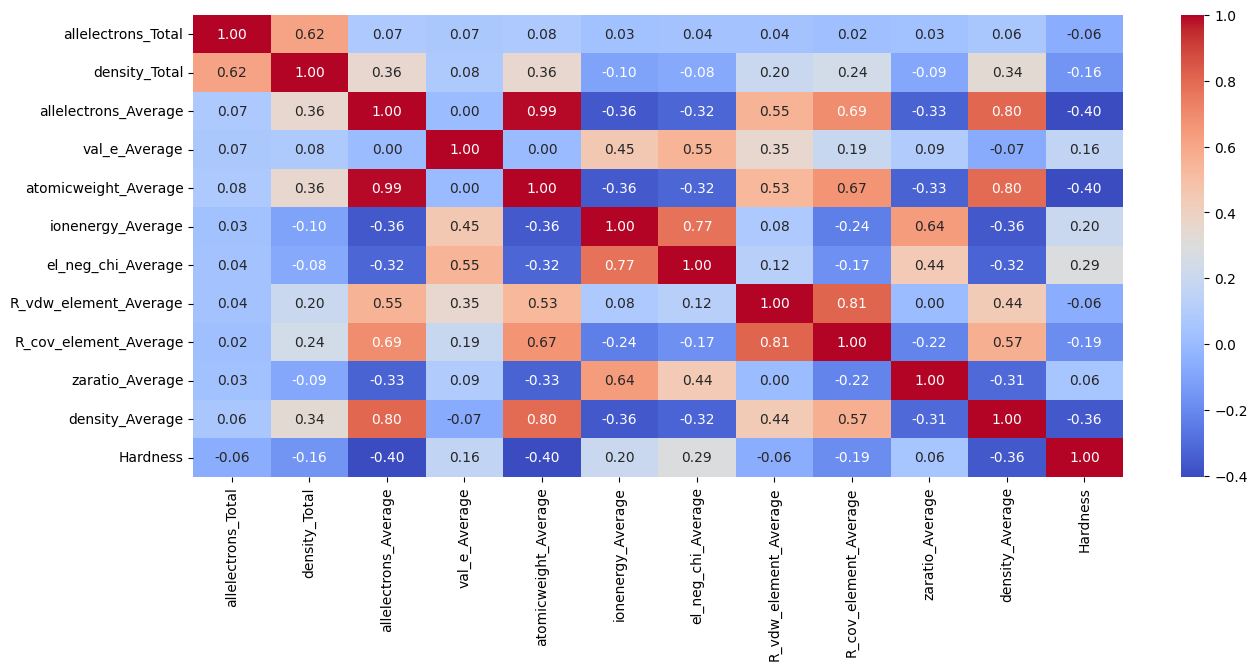

In [237]:
plt.figure(figsize=(15,6))
sns.heatmap(correlation_matrix,annot=True,xticklabels=features,yticklabels=features,fmt=".2f",cmap="coolwarm")

## 1.1 Sorting based on hardness

Looking for **patterns** and observing whether they increase iteratively or by step.

In [238]:
train = train.sort_values(by='Hardness',ascending=True)

In [239]:
train.head(3)

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
4727,394.0,147.252,47.251424,3.73913,114.951853,10.961994,2.620009,1.782048,1.61584,0.450078,5.97378,1.0
3481,144.0,15.550,24.000000,5.00000,53.490297,10.131440,2.295000,1.825000,1.12000,0.479965,3.78486,1.0
6880,68.0,13.350,30.000000,4.00000,68.562730,10.629000,1.942500,1.875000,1.23750,0.490914,9.54775,1.3


[]

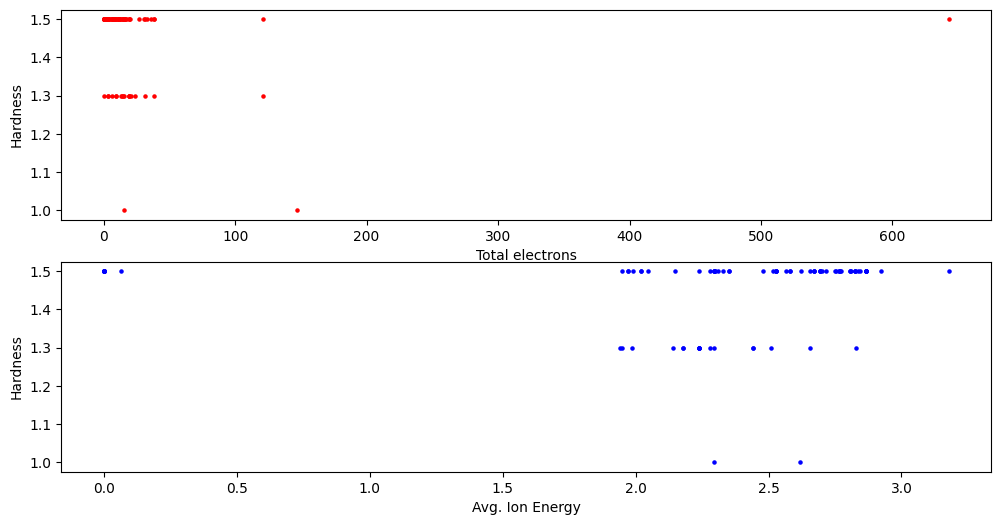

In [240]:
fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(12,6))
axes[0].scatter(train.iloc[:100,1],train.iloc[:100,-1],color='red',s=5)
axes[0].set_ylabel('Hardness')
axes[0].set_xlabel('Total electrons')

axes[1].scatter(train.iloc[:100,6],train.iloc[:100,-1],color='blue',s=5)
axes[1].set_ylabel('Hardness')
axes[1].set_xlabel('Avg. Ion Energy')
plt.plot()

In [241]:
zero_count = (train == 0).sum()
sorted_columns = zero_count.sort_values(ascending=False)

print(sorted_columns)

atomicweight_Average     77
R_cov_element_Average    77
allelectrons_Total       76
allelectrons_Average     76
ionenergy_Average        73
val_e_Average            71
R_vdw_element_Average    68
el_neg_chi_Average       67
zaratio_Average          62
density_Average          56
density_Total            54
Hardness                  0
dtype: int64


Removing **zero-based** samples from the train set.

In [242]:
train = train[(train != 0).all(axis=1)]

train.head(20)

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
4727,394.0,147.252000,47.251424,3.739130,114.951853,10.961994,2.620009,1.782048,1.615840,0.450078,5.97378,1.0
3481,144.0,15.550000,24.000000,5.000000,53.490297,10.131440,2.295000,1.825000,1.120000,0.479965,3.78486,1.0
6880,68.0,13.350000,30.000000,4.000000,68.562730,10.629000,1.942500,1.875000,1.237500,0.490914,9.54775,1.3
1114,74.0,9.509324,24.666667,4.333333,53.356000,9.270800,2.440000,1.905000,1.120000,0.478570,4.56650,1.3
8253,74.0,14.220000,24.666667,4.000000,53.356000,9.270800,2.440000,1.923333,1.120000,0.478570,4.52755,1.3
6284,74.0,19.334000,24.666667,4.333333,53.356000,9.270800,2.280000,1.923333,1.180000,0.478570,6.78667,1.3
2359,183.0,31.800000,61.000000,4.333333,150.722190,8.054000,1.986667,2.093333,1.363333,0.405373,0.38618,1.3
1355,74.0,14.632000,24.666667,4.333333,53.356000,9.270800,2.140000,1.910000,1.140000,0.478570,1.43926,1.3
9317,110.0,23.550000,36.000000,3.666667,82.598467,11.260117,2.180000,1.900000,1.183333,0.452667,7.77500,1.3
3405,70.0,9.440000,21.000000,4.000000,43.952000,9.131200,2.240000,1.880000,1.140000,0.477665,3.49200,1.3


## 1.2 Handling outliers

In [243]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5

outliers = ((train < (Q1 - threshold * IQR)) | (train > (Q3 + threshold * IQR)))

outliers_rows = train[outliers.any(axis=1)]
print(outliers_rows)

       allelectrons_Total  density_Total  allelectrons_Average  val_e_Average  \
4727                394.0     147.252000             47.251424       3.739130   
6880                 68.0      13.350000             30.000000       4.000000   
6284                 74.0      19.334000             24.666667       4.333333   
2359                183.0      31.800000             61.000000       4.333333   
9317                110.0      23.550000             36.000000       3.666667   
...                   ...            ...                   ...            ...   
3120                 41.0       9.440000             20.500000       4.000000   
9778                 96.0       9.143996             23.000000       4.000000   
9577                 40.0       2.334164              6.666667       4.000000   
10399                36.0       8.903332             18.000000       4.000000   
2357                 12.0       1.663464             12.000000       4.000000   

       atomicweight_Average

## 2. Training

In [244]:
X = train.iloc[:, :-1]  # All columns except the last one
y = train.iloc[:, -1]   # Last column
X_test = test.iloc[:,1:]
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,shuffle=False,random_state=seed)

In [245]:
huber_reg = HuberRegressor(epsilon=1.,max_iter=200)  # Adjust epsilon as needed
huber_reg.fit(X_train, y_train)

HuberRegressor(epsilon=1.0, max_iter=200)

In [246]:
y_pred = huber_reg.predict(X_val)   

In [247]:
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.394212893946961


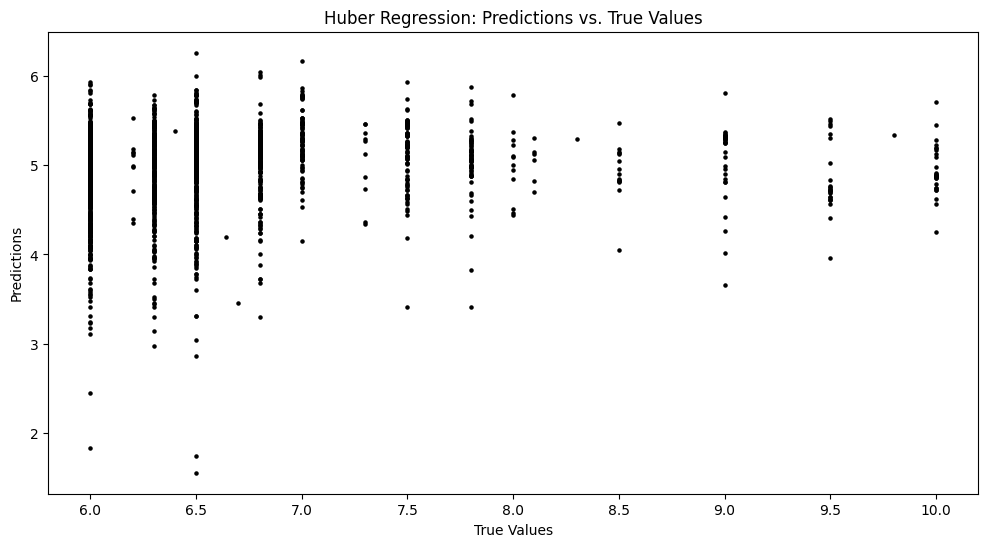

In [248]:
plt.figure(figsize=(12,6))
plt.scatter(y_val, y_pred,s=5,color='black')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Huber Regression: Predictions vs. True Values')
plt.show()

In [249]:
test_preds = huber_reg.predict(X_test)

## Kaggle

In [250]:
submission_data = np.column_stack((test.iloc[:,0],test_preds))
np.savetxt('kaggle.csv', submission_data, delimiter=',', header='id,Hardness', fmt='%d,%.4f', comments='')